## Escuela de Ingeniería en Computación, ITCR 

## Aprendizaje automático


## Árboles de decisión

## Introducción

Un **árbol de decisión** es un algoritmo de aprendizaje supervisado **no paramétrico**, que se utiliza tanto para tareas de clasificación como de regresión y proporciona un conjunto de reglas que se van aplicando sobre los ejemplos nuevos para decidir, por ejemplo, qué clasificación es la más adecuada dados sus atributos o propiedades. Son métodos de predicción poderosos y extremadamente populares por su facilidad de interpretación.

Los árboles de decisión proporcionan la base para métodos de ensamble más avanzados, como bagging, random forests y gradient boosting.


### Tipos de árboles de decisión
El algoritmo de Hunt (1960) para modelar el aprendizaje humano en Psicología, forma la base de muchos algoritmos de árboles de decisión populares, como los siguientes: 

- **ID3 o "Iterative Dichotomiser 3"** (Quinlan, 1979): Este algoritmo aprovecha la entropía y la ganancia de información como métricas para evaluar las divisiones de candidatos.

- **C4.5**: consiste en una iteración posterior de ID3, que también fue desarrollado por Quinlan. Puede utilizar la ganancia de información o las proporciones de ganancia para evaluar los puntos de división dentro de los árboles de decisión. 

- **CART o "árboles de clasificación y regresión"**: fue introducido por Leo Breiman. Este algoritmo, generalmente utiliza la impureza de Gini para identificar el atributo ideal para la división. La impureza de Gini mide la frecuencia con la que se clasifica incorrectamente un atributo elegido al azar (un valor menor es más ideal). 

La representación del **modelo CART es un árbol binario**. Un nodo representa una sola variable de entrada (X) y un punto de división en esa variable, suponiendo que la variable sea numérica. Los nodos hoja (también llamados nodos terminales) del árbol contienen una variable de salida (y) que se usa para hacer una predicción.

Una vez creado, se puede navegar por un árbol con una nueva muestra a procesar siguiendo cada rama con las divisiones hasta que se llega a la predicción final.


### Creación de un árbol de decisión

La **creación de un árbol de decisión** es un proceso de división del espacio de entrada. Se utiliza un enfoque codicioso para dividir el espacio llamado **división recursiva**. Este es un procedimiento numérico en el que todos los valores se alinean y se prueban diferentes puntos de división utilizando una función de costo. Se selecciona la división con el mejor costo. 

Las funciones de costo:

 - Regresión: la función de costo que se minimiza para elegir puntos de división es la suma del error cuadrático en todas las muestras de entrenamiento que se encuentran dentro del rectángulo.

 - Clasificación: se usa la función de costo Gini, que proporciona una indicación de qué tan puros son los nodos, donde la pureza del nodo se refiere a qué tan mezclados están los datos de entrenamiento asignados a cada nodo.

La división continúa hasta que los nodos contienen un número mínimo de ejemplos de entrenamiento o se alcanza una profundidad de árbol máxima.


### Estructura de un árbol de decisión 

![title](../imagenes/img2.png)


Un árbol de decisión está formado por un conjunto de nodos de decisión (interiores) y de nodos-respuesta (hojas):

* Un **nodo de decisión está asociado a uno de los atributos** y tiene ramas que salen de él, cada una de ellas representando los posibles valores que puede tomar el atributo asociado. Un nodo de decisión es una pregunta que se le hace al ejemplo analizado, y dependiendo de la respuesta que de, el flujo tomará una de las ramas salientes.


* Un **nodo-respuesta está asociado a la clasificación que se quiere proporcionar**, y devuelve la decisión del árbol con respecto al ejemplo de entrada.



### ¿Cómo se construye un árbol de decisión?

La idea básica es la siguiente:

1. Se selecciona el mejor atributo utilizando medidas de selección de atributos (ASM) para dividir los registros. 

2. Se crea un nodo de decisión para el atributo seleccionado y se divide el conjunto de datos en subconjuntos más pequeños recursivamente para cada hijo hasta que ocurre una de las siguientes condiciones:
    * Todas las tuplas pertenecen al mismo valor de atributo.
    * No quedan más atributos.
    * No hay más instancias.
    
    
    
![title](../imagenes/img4.png)




### Medidas de selección de atributos

**Entropía y ganancia de información**

####  Ganancia de información

La ganancia de información es una propiedad estadística que mide qué tan bien un atributo dado separa los ejemplos de entrenamiento de acuerdo con sus clasificación objetivo.

Para poder calcular la ganancia de información, primero se debe definir el término entropía de un conjunto de datos.


**La Entropia:** En física y matemáticas, la entropía se conoce como aleatoriedad o impureza en el sistema.  En teoría de la información, se refiere a la impureza en un grupo de ejemplos.

La ganancia de información es una disminución de la entropía.


![title](../imagenes/img6.png)



La fórmula de la entropía es la siguiente:

$$Entropy(S)=-\sum_{c\epsilon C}p(c)\log_{2}p(c)$$

Con
- S que representa el conjunto de datos 
- c representa las clases en el conjunto de datos S
- y p(c) representa la proporción de muestras que pertenecen a la clase c del total de muestras en el conjunto de datos S

Los valores de entropía pueden estar entre 0 y 1. Si todas las muestras en el conjunto de datos S pertenecen a una clase, entonces la entropía será igual a cero. Si la mitad de las muestras se clasifican en una clase y la otra mitad en otra clase, la entropía estará en su punto más alto en 1. 

Para seleccionar la mejor característica para dividir y encontrar el árbol de decisión óptimo, se debe usar el atributo con **la menor entropía**.

La **ganancia de información** representa la diferencia de entropía antes y después de una división en un atributo determinado. El **atributo con la ganancia de información más alta producirá la mejor división**, ya que hace el mejor trabajo al clasificar los datos de entrenamiento de acuerdo con su clasificación de destino. La ganancia de información generalmente se representa con la siguiente fórmula, donde: 

$$InformationGain(S,a)=Entropy(S)-\sum_{v\epsilon values(a)}\frac{|S_{v}|}{|S|}Entropy(S_{v})$$


Con:
- **a** que representa una característica.
- **Entropy(S)** es la entropía del conjunto de datos S
- **$\frac{|S_{v}|}{|S|}$** representa la proporción de los valores en $S_{v}$ del número de valores en el conjunto de datos, S. Con v un valor de etiqueta de la clase a.
- $Entropy(S_{v})$ es la entropía del conjunto de datos, $S_{v}$.

**Ejemplo**

Se tiene el siguiente conjunto de datos (IBM, n.d.):

![](../imagenes/tabla.png)


Para este conjunto de datos, la entropía es 0.94. Esto se puede calcular al encontrar la proporción de días en los que "Jugar al tenis" es "Sí", que es 9/14, y la proporción de días en los que "Jugar al tenis" es "No", que es 5/14. Luego, estos valores se pueden usar en la fórmula de entropía anterior:

Entropía (S) = -(9/14) log2(9/14) – (5/14) log2 (5/14) = 0.94

Entonces podemos calcular la ganancia de información para cada uno de los atributos individualmente. Por ejemplo, la ganancia de información para el atributo "Humedad" sería la siguiente:

Ganancia (S, Humedad) = (0.94)-(7/14)*(0.985) – (7/14)*(0.592) = 0.151


Explicación de los cálculos:

- 7/14 representa la proporción de valores donde la humedad es igual a "alta" respecto al número total de valores de humedad. En este caso, el número de valores donde la humedad es igual a "alta" es el mismo que el número de valores donde la humedad es igual a "normal".
- 0.985 es la entropía cuando Humedad es = a "alta"
- 0.59 es la entropía cuando Humedad es = a "normal"

Luego, **repita el cálculo de la ganancia de información para cada atributo de la tabla anterior y seleccione el atributo con la ganancia de información más alta** para que sea el primer punto de división en el árbol de decisión. En este caso, Outlook produce la mayor ganancia de información. A partir de ahí, el proceso se repite para cada subárbol. 


**Impureza de Gini** 

La impureza de Gini es la probabilidad de clasificar incorrectamente un punto de datos aleatorio en el conjunto de datos si se etiquetara en función de la distribución de clases del conjunto de datos. Similar a la entropía, **si el conjunto S es puro (es decir, pertenece a una clase), entonces su impureza es cero**. Esto se denota mediante la siguiente fórmula: 

$$GiniImpurity=1-\sum_{i}(p_{i})^{2}$$

Donde 
- $p_{i}$ corresponde a la proporción de muestras de esa clase en un nodo particular del árbol respecto al total de muestras.

(ejemplo de cálculo abajo con dataset Iris)

In [11]:
# Entrenar y predecir con árboles de decisión para clasificación

from sklearn.datasets import load_iris # datos de iris
from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación
from sklearn import tree

# Conjunto de datos Iris
iris = load_iris()
print("====================================================")
print("Muestras de conjunto de datos")
print(iris.target_names)
print("====================================================")

# Entrenar un árbol de decisión para clasificar los datos de Iris
treeM = DecisionTreeClassifier(max_depth=2, random_state=42)
treeM.fit(iris.data, iris.target) # entrenamiento del árbol
print("====================================================")
print("Muestras de conjunto de datos")
print("Características", iris.data[47:53])
print("Clase a la que pertenecen o target", iris.target[47:53])
print("====================================================")

# Se utiliza el método predict para obtener predicciones
print("Predicción")
print( treeM.predict(iris.data[47:53]) )
print("====================================================")
print("Probabilidades de que una muestra peetenezca a la clase")
# si queremos saber las probabilidades podemos usar el método predict_proba
print( treeM.predict_proba(iris.data[47:53]) )
# la primera clase (Setosa) corresponde a la primera columna, la segunda clase en la segunda, etc..
# este es el resultado:
# [[1.         0.         0.        ]
#  [1.         0.         0.        ]
#  [1.         0.         0.        ]
#  [0.         0.90740741 0.09259259]
#  [0.         0.90740741 0.09259259]
#  [0.         0.90740741 0.09259259]]

Muestras de conjunto de datos
['setosa' 'versicolor' 'virginica']
Muestras de conjunto de datos
Características [[4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]]
Clase a la que pertenecen o target [0 0 0 1 1 1]
Predicción
[0 0 0 1 1 1]
Probabilidades de que una muestra peetenezca a la clase
[[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.90740741 0.09259259]
 [0.         0.90740741 0.09259259]
 [0.         0.90740741 0.09259259]]


[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

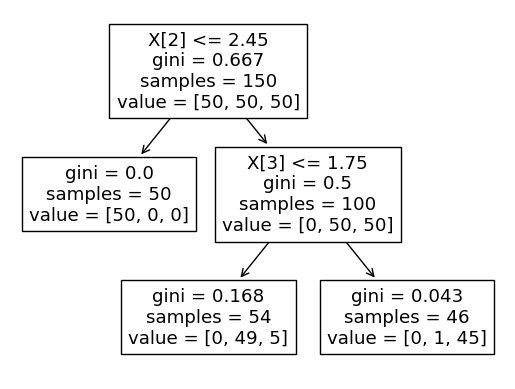

In [8]:
# Visualizar el árbol
# En el nodo hoja los valores en el vector value indican la cantidad 
# de muestras en cada una de las clases que cumplen con los 
# criterios utilizados. Se selecciona la clase con más muestras.

tree.plot_tree(treeM)

In [16]:
# Importancia de los atributos en un árbol de decisión
for name, importance in zip(iris.feature_names, adr.feature_importances_):
    print(name + ': ' + str(importance))


sepal length (cm): 0.026703117716071825
sepal width (cm): 0.0
petal length (cm): 0.0
petal width (cm): 0.0


**En el ejemplo de las Iris (abajo)** 
gini = 0.168 (de la hoja 2 del árbol de izquierda a derecha) 

Se calcula como: 
$Gini_{versicolor}=1-\sum_{i}(p_{i})^{2}=1-(\frac{0}{54})^{2}-(\frac{49}{54})^{2}-(\frac{5}{54})^{2}=0.168$

### Ejemplo de uso de árboles de desición en análisis de regresión

In [14]:
# Entrenar y predecir con árboles de decisión para regresión

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Se importan los datos de la misma librería de scikit-learn
boston = datasets.load_boston()

#Se selecciona solamente la columna 6 del dataset
#X_adr = boston.data[:, np.newaxis, 5]
X =  boston.data

# Se define los datos correspondientes a los targets
y = boston.target

#Se separan los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Se instancia el modelo
adr = DecisionTreeRegressor(max_depth = 5)

# Se entrena el modelo
adr.fit(X_train, y_train)

# Se realiza una predicción
Y_pred = adr.predict(X_test)

# Coeficiente de determinación R2 o la suma de los cuadrados de la pérdida 
# ((y_true - y_pred)** 2).sum().
# Recuerden que la mejor puntuación posible es 1,0 y puede ser negativa 
# (porque el modelo puede ser arbitrariamente malo). 
print('Precisión del modelo:')
print(adr.score(X_test, y_test))

Precisión del modelo:
0.8191643710397213


/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [17]:
# Importancia de los atributos en un árbol de decisión
for name, importance in zip(boston.feature_names, adr.feature_importances_):
    print(name + ': ' + str(importance))


CRIM: 0.026703117716071825
ZN: 0.0
INDUS: 0.0
CHAS: 0.0
NOX: 0.006431017227437397
RM: 0.24297501750903727
AGE: 0.007987096173748631
DIS: 0.07838913598907865
RAD: 0.0
TAX: 0.0
PTRATIO: 0.01261317186863124
B: 0.013304946092806288
LSTAT: 0.6115964974231888


### Ventajas de los árboles de decisión (Scikit-Learn, v1.2.2):

- Fácil de entender y de interpretar. Los árboles se pueden visualizar.

- Requiere poca preparación de datos. Otras técnicas a menudo requieren la normalización de datos, es necesario crear variables ficticias y eliminar valores en blanco. Sin embargo, algunas bibliotecas no admiten valores faltantes.

- El costo de usar el árbol (es decir, predecir datos) es logarítmico en la cantidad de puntos de datos usados para entrenar el árbol.

- Capaz de manejar datos numéricos y categóricos. Sin embargo, la implementación de scikit-learn no admite variables categóricas por ahora.

- Utiliza un modelo de caja blanca. Si una situación dada es observable en un modelo, la explicación de la condición se explica fácilmente mediante lógica booleana. Por el contrario, en un modelo de caja negra (por ejemplo, en una red neuronal artificial), los resultados pueden ser más difíciles de interpretar.

- Posibilidad de validar un modelo mediante pruebas estadísticas. Eso permite dar cuenta de la fiabilidad del modelo.



**Desventajas de los árboles de decisión**

- Los árboles demasiado complejos puede que no generalicen bien. Esto se llama sobreajuste. Para evitar este problema, son necesarios mecanismos como la poda, establecer el número mínimo de muestras requeridas en un nodo hoja o establecer la profundidad máxima del árbol.

- Los árboles de decisión pueden ser inestables porque pequeñas variaciones en los datos pueden generar un árbol completamente diferente. Este problema se mitiga mediante el uso de árboles de decisión dentro de un ensamble (ej. Random Forest).

- Se sabe que el problema de aprender un árbol de decisión óptimo es NP-completo bajo varios aspectos de optimización e incluso para conceptos simples. En consecuencia, los algoritmos prácticos de aprendizaje del árbol de decisiones se basan en algoritmos heurísticos, como el algoritmo voraz, en el que se toman decisiones localmente óptimas en cada nodo. Dichos algoritmos no pueden garantizar la devolución del árbol de decisión globalmente óptimo. Esto se puede mitigar entrenando varios árboles en un ensamble.

- Hay conceptos que son difíciles de aprender porque los árboles de decisión no los expresan fácilmente, como la función XOR.

- Los árboles de decisión pueden estar sesgados si las clases no están balanceadas. 

### Ensambles: Random Forest

Los bosques aleatorios o los bosques de decisiones aleatorias son un método de aprendizaje por ensamble para clasificación o regresión  que opera mediante la construcción de un conjunto de árboles de decisión durante el entrenamiento. Para las tareas de clasificación, la salida del bosque aleatorio es la clase seleccionada por la mayoría de los árboles para regresión se utiliza el promedio de las salidas.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
     random_state=0)

clf = DecisionTreeClassifier(max_depth=None, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = RandomForestClassifier(n_estimators=50, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())



0.9823000000000001
1.0


## ¿Cómo seleccionar el número de árboles? 

**Una opción es utilizar validación cruzada K-fold**

La validación cruzada K-fold es un procedimiento en el que un conjunto de datos se divide en múltiples conjuntos de entrenamiento y validación (pliegues), donde k es el número de ellos, para ayudar a proteger el modelo contra el sesgo aleatorio causado por la selección de un solo entrenamiento y validación.

La validación cruzada K-fold se puede utilizar para evaluar los modelos y para afinar parámetros, por ejemplo en este caso el número de árboles requeridos.

La evaluación del modelo implica el uso del conjunto de datos disponible para ajustar un modelo y estimar su rendimiento al hacer predicciones sobre ejemplos no vistos. Este es un problema desafiante, ya que tanto el conjunto de datos de entrenamiento utilizado para ajustar el modelo como el conjunto de prueba utilizado para evaluarlo deben ser lo suficientemente grandes y representativos del problema subyacente para que la estimación resultante del rendimiento del modelo no sea demasiado optimista o pesimista.

Los dos enfoques más comunes utilizados para la evaluación del modelo son **la división de datos de entrenamiento/pruebas y el procedimiento de validación cruzada de k-fold**. Ambos enfoques pueden ser muy efectivos en general, aunque pueden generar resultados engañosos y fallar potencialmente cuando se usan en problemas de clasificación con clases desbalanceadas. En este caso se puede utilizar validación cruzada estratificada. La validación cruzada estratificada asegura que la proporción de ejemplos positivos y negativos que se encuentran en la distribución original se respeta en todos los pliegues (folds).

{'10': RandomForestClassifier(n_estimators=10)}
{'10': RandomForestClassifier(n_estimators=10), '50': RandomForestClassifier(n_estimators=50)}
{'10': RandomForestClassifier(n_estimators=10), '50': RandomForestClassifier(n_estimators=50), '100': RandomForestClassifier()}
{'10': RandomForestClassifier(n_estimators=10), '50': RandomForestClassifier(n_estimators=50), '100': RandomForestClassifier(), '500': RandomForestClassifier(n_estimators=500)}
{'10': RandomForestClassifier(n_estimators=10), '50': RandomForestClassifier(n_estimators=50), '100': RandomForestClassifier(), '500': RandomForestClassifier(n_estimators=500), '1000': RandomForestClassifier(n_estimators=1000)}
Número de árboles, precisión promedio y desviación promedio >10 0.873 (0.032)
Número de árboles, precisión promedio y desviación promedio >50 0.901 (0.025)
Número de árboles, precisión promedio y desviación promedio >100 0.904 (0.025)
Número de árboles, precisión promedio y desviación promedio >500 0.905 (0.024)
Número de 

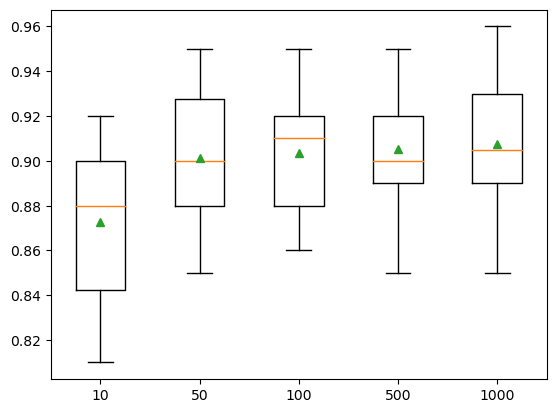

In [21]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
 return X, y
 

def get_models():
 """
 # generate a list of models to evaluate
 """

 # model dictionary   
 models = dict()
 # define the number of trees to define in each model.
 n_trees = [10, 50, 100, 500, 1000]
 # instantiate models    
 for n in n_trees:
     models[str(n)] = RandomForestClassifier(n_estimators=n)
     print(models)
 return models
 
def evaluate_model(model, X, y):
 """
 Evaluate a given model using cross-validation
 return: the model accuracy.
 """
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate the model and collect the results
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 # evaluate the model
 scores = evaluate_model(model, X, y)
 # store the results
 results.append(scores)
 names.append(name)
 # summarize the performance along the way
 print("Número de árboles, precisión promedio y desviación promedio", '>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Se observa que el rendimiento aumenta y se mantiene después de unos 100 árboles. Los resultados pueden variar debido a los estocástico del ejemplo.

## Bibliografia

- Quinlan, J.R. (1979) Discovering Rules by Induction from Large Collections of Examples. Expert Sys-tems in the Micro Electronic Age. Edinburgh University Press. (Introducing ID3).

- IBM (n.d). ¿Qué es un árbol de decisión?. Recuperado de https://www.ibm.com/es-es/topics/decision-trees
- Scikit-Learn (v1.2.2). sklearn.tree.DecisionTreeClassifier. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

- Brownlee, J. (2016). How To Implement The Decision Tree Algorithm From Scratch In Python. Recuperado de https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

- Brownlee, J. (2020). How to Develop a Random Forest Ensemble in Python.
Recuperado de https://machinelearningmastery.com/random-forest-ensemble-in-python/

- Brownlee, J. (2020). How to Fix k-Fold Cross-Validation for Imbalanced Classification. Recuperado de https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/